# WeatherPy
----

#### Observations
* There is a higher correlation between latitude and temperature in the northern hemisphere, but it's less so in the Southern hemisphere.
* There is a weaker correlation between latitude and humidity in both hemispheres.
* It is safe to assume that cloudiness is not dependent on the latitude around at least this time of the year. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import time
import datetime
import numpy as np
import random
import requests
from citipy import citipy
from api_keys import weather_api_key
from api_keys import g_key
from pprint import pprint
from scipy.stats import linregress

output_data_file = 'output_data/cities.csv'

lat = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
lat_lngs = []
cities = []

lats = np.random.uniform(low = -90.000, high = 90.000, size = 1500)
lngs = np.random.uniform(low = -180.000, high = 180.000, size = 1500)
lat_lngs = zip(lats, lngs)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    #If unique
    if city not in cities:
        cities.append(city)
        
len(cities)

619


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
print('Beginning Data Retrieval')
print('---------------------------')

url = 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=da778ebec64581d2e8a1ac000c976aa0'

city_data = []

record = 0
sets = 1

for i, city in enumerate(cities):
    if (i % 50 == 0 and i >= 50):
        sets += 1
        record = 0

    city_url = url + "&q=" + city
    print("Processing Record %s of Set %s | %s" % (record, sets, city))
    record += 1
    try:
        city_weather = requests.get(city_url).json()
        citylat = city_weather["coord"]["lat"]
        citylng = city_weather["coord"]["lon"]
        citymaxtemp = city_weather["main"]["temp_max"]
        cityhumidity = city_weather["main"]["humidity"]
        cityclouds = city_weather["clouds"]["all"]
        citywind = city_weather["wind"]["speed"]
        citycountry = city_weather["sys"]["country"]
        citydate = city_weather["dt"]

        city_data.append({"City": city, 
                          "Lat": citylat, 
                          "Lng": citylng, 
                          "Max Temp": citymaxtemp,
                          "Humidity": cityhumidity,
                          "Cloudiness": cityclouds,
                          "Wind Speed": citywind,
                          "Country": citycountry,
                          "Date": citydate})

    # If error
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval
---------------------------
Processing Record 0 of Set 1 | marzuq
Processing Record 1 of Set 1 | bandarbeyla
Processing Record 2 of Set 1 | gillette
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 5 of Set 1 | port alfred
Processing Record 6 of Set 1 | kulhudhuffushi
Processing Record 7 of Set 1 | vardo
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | ponta do sol
Processing Record 10 of Set 1 | karakendzha
City not found. Skipping...
Processing Record 11 of Set 1 | soe
Processing Record 12 of Set 1 | chuy
Processing Record 13 of Set 1 | port-cartier
Processing Record 14 of Set 1 | sept-iles
Processing Record 15 of Set 1 | saskylakh
Processing Record 16 of Set 1 | bluff
Processing Record 17 of Set 1 | the valley
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | hasaki
Processing Record 20 of Set 1 | saint george
Processing Record 21 of S

City not found. Skipping...
Processing Record 38 of Set 4 | mount darwin
Processing Record 39 of Set 4 | sorvag
City not found. Skipping...
Processing Record 40 of Set 4 | chapais
Processing Record 41 of Set 4 | punta alta
Processing Record 42 of Set 4 | dingle
Processing Record 43 of Set 4 | havoysund
Processing Record 44 of Set 4 | new norfolk
Processing Record 45 of Set 4 | tsogni
Processing Record 46 of Set 4 | pajan
Processing Record 47 of Set 4 | pevek
Processing Record 48 of Set 4 | lorengau
Processing Record 49 of Set 4 | little current
Processing Record 0 of Set 5 | hendijan
City not found. Skipping...
Processing Record 1 of Set 5 | kodiak
Processing Record 2 of Set 5 | barranca
Processing Record 3 of Set 5 | santa helena de goias
Processing Record 4 of Set 5 | dunedin
Processing Record 5 of Set 5 | khandyga
Processing Record 6 of Set 5 | nata
Processing Record 7 of Set 5 | george town
Processing Record 8 of Set 5 | verkhnyaya inta
Processing Record 9 of Set 5 | mount gambier


Processing Record 29 of Set 8 | sabang
Processing Record 30 of Set 8 | guerrero negro
Processing Record 31 of Set 8 | uyuni
Processing Record 32 of Set 8 | tamale
Processing Record 33 of Set 8 | robore
Processing Record 34 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 35 of Set 8 | catamarca
Processing Record 36 of Set 8 | yangjiang
Processing Record 37 of Set 8 | alekseyevsk
Processing Record 38 of Set 8 | loviisa
Processing Record 39 of Set 8 | bilokurakyne
Processing Record 40 of Set 8 | lodja
Processing Record 41 of Set 8 | talnakh
Processing Record 42 of Set 8 | sao joao do paraiso
Processing Record 43 of Set 8 | santa cruz de tenerife
Processing Record 44 of Set 8 | zhangjiakou
Processing Record 45 of Set 8 | mizan teferi
Processing Record 46 of Set 8 | tatui
Processing Record 47 of Set 8 | linxi
Processing Record 48 of Set 8 | gamba
Processing Record 49 of Set 8 | saldanha
Processing Record 0 of Set 9 | pandan
Processing Record 1 of Set 9 | biak
Processing R

Processing Record 15 of Set 12 | mogocha
Processing Record 16 of Set 12 | marawi
Processing Record 17 of Set 12 | tecoanapa
Processing Record 18 of Set 12 | knysna
Processing Record 19 of Set 12 | yumen
Processing Record 20 of Set 12 | kenora
Processing Record 21 of Set 12 | sindand
City not found. Skipping...
Processing Record 22 of Set 12 | oriximina
Processing Record 23 of Set 12 | pauini
Processing Record 24 of Set 12 | svetlaya
Processing Record 25 of Set 12 | harper
Processing Record 26 of Set 12 | palabuhanratu
City not found. Skipping...
Processing Record 27 of Set 12 | ouro preto do oeste
Processing Record 28 of Set 12 | porbandar
Processing Record 29 of Set 12 | boksitogorsk
Processing Record 30 of Set 12 | dicabisagan
Processing Record 31 of Set 12 | carikar
City not found. Skipping...
Processing Record 32 of Set 12 | igualada
Processing Record 33 of Set 12 | sovetskiy
Processing Record 34 of Set 12 | ahipara
Processing Record 35 of Set 12 | dapaong
Processing Record 36 of S

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
citydatapd = pd.DataFrame(city_data)
citydatapd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,marzuq,14.40,46.47,69.13,35,62,6.64,YE,1609565601
1,bandarbeyla,9.49,50.81,76.24,64,48,19.55,SO,1609565601
2,gillette,44.29,-105.50,28.40,54,1,18.34,US,1609565602
3,punta arenas,-53.15,-70.92,53.60,58,0,26.40,CL,1609565362
4,port alfred,-33.59,26.89,68.00,70,45,1.99,ZA,1609565602


In [6]:
pd.to_numeric(citydatapd['Lat']).astype(float)
pd.to_numeric(citydatapd['Lng']).astype(float)
pd.to_numeric(citydatapd['Max Temp']).astype(float)
pd.to_numeric(citydatapd['Humidity']).astype(float)
pd.to_numeric(citydatapd['Cloudiness']).astype(float)
pd.to_numeric(citydatapd['Wind Speed']).astype(float)
citydatapd

citydatapd.to_csv('citydatapd.csv')
citydatapd.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
humidcity = citydatapd[(citydatapd["Humidity"] > 100)].index                        
humidcity

Int64Index([], dtype='int64')

In [10]:
nothumidcity = citydatapd.drop(humidcity, inplace=False)
nothumidcity.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,marzuq,14.40,46.47,69.13,35,62,6.64,YE,1609565601
1,bandarbeyla,9.49,50.81,76.24,64,48,19.55,SO,1609565601
2,gillette,44.29,-105.50,28.40,54,1,18.34,US,1609565602
3,punta arenas,-53.15,-70.92,53.60,58,0,26.40,CL,1609565362
4,port alfred,-33.59,26.89,68.00,70,45,1.99,ZA,1609565602


In [11]:
# Extract relevant fields from the data frame
lat = nothumidcity['Lat']
lng = nothumidcity['Lng']
maxtemp = nothumidcity['Max Temp']
humidity = nothumidcity['Humidity']
cloudiness = nothumidcity['Cloudiness']
windspeed = nothumidcity['Wind Speed']
country = nothumidcity['Country']

# Export the City_Data into a csv
nothumidcity.to_csv('non_humid_cities.csv', index_label="City_ID")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

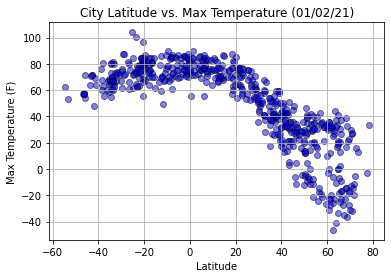

In [12]:
plt.scatter(lat, maxtemp, edgecolor='black', facecolor='blue', linewidths=1, marker='o', alpha=0.5, label='Cities')

plt.title('City Latitude vs. Max Temperature (%s)' % time.strftime('%x'))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

plt.savefig('../output_data/Lat_Temp.png')
plt.show()

## Latitude vs. Humidity Plot

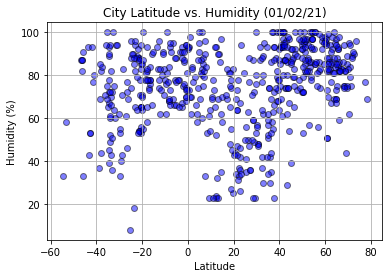

In [13]:
plt.scatter(lat, humidity, edgecolor='black', facecolor='blue', linewidths=1, marker='o', alpha=0.5, label='Cities')

plt.title('City Latitude vs. Humidity (%s)' % time.strftime('%x'))
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

plt.savefig('../output_data/Lat_Humidity.png')
plt.show()

## Latitude vs. Cloudiness Plot

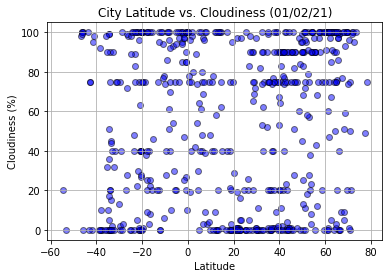

In [14]:
plt.scatter(lat, cloudiness, edgecolor='black', facecolor='blue', linewidths=1, marker='o', alpha=0.5, label='Cities')

plt.title('City Latitude vs. Cloudiness (%s)' % time.strftime('%x'))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

plt.savefig('../output_data/Lat_Clouds.png')
plt.show()

## Latitude vs. Wind Speed Plot

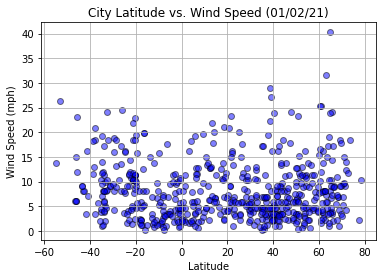

In [16]:
plt.scatter(lat, windspeed, edgecolor='black', facecolor='blue', linewidths=1, marker='o', alpha=0.5, label='Cities')

plt.title('City Latitude vs. Wind Speed (%s)' % time.strftime('%x'))
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

plt.savefig('../output_data/Lat_WindSpeed.png')
plt.show()

## Linear Regression

In [17]:
northern = citydatapd.loc[(citydatapd['Lat'] >= 0)]
southern = citydatapd.loc[(citydatapd['Lat'] < 0)]

def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=10,color='red')
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f'The r-value is: {rvalue**2}')
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7087432899736009


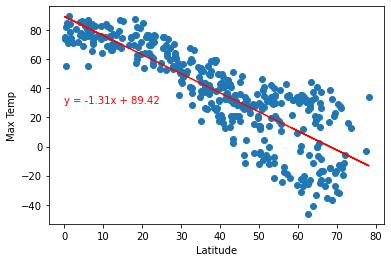

In [18]:
x_values = northern['Lat']
y_values = northern['Max Temp']
plot_linear_regression(x_values, y_values, 'Max Temp',(0,30))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.22330386774975014


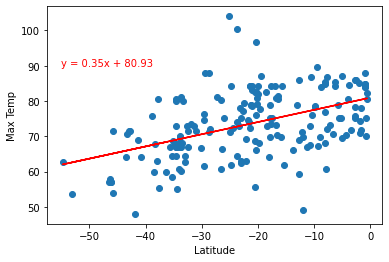

In [19]:
x_values = southern['Lat']
y_values = southern['Max Temp']
plot_linear_regression(x_values, y_values, 'Max Temp',(-55,90))

The higher r-value indicates higher correlation between latitude and temperature in the northern hemisphere, but the lower r-value indicates weaker correlation between latitude and max temperature in the Southern hemisphere. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.1255376306489879


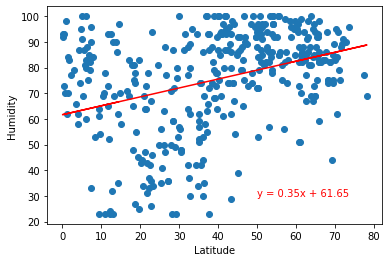

In [20]:
x_values = northern['Lat']
y_values = northern['Humidity']
plot_linear_regression(x_values, y_values, 'Humidity',(50,30))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.06812616227841702


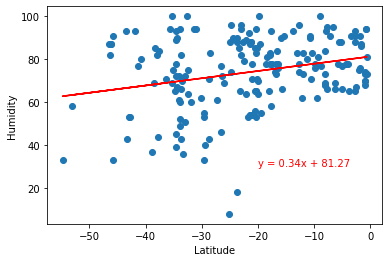

In [21]:
x_values = southern['Lat']
y_values = southern['Humidity']
plot_linear_regression(x_values, y_values, 'Humidity',(-20,30))

The lower r-value indicates weaker correlation between latitude and humidity in both hemispheres.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.043477200216332404


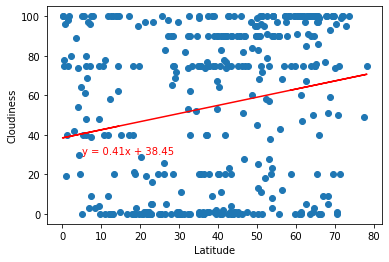

In [22]:
x_values = northern['Lat']
y_values = northern['Cloudiness']
plot_linear_regression(x_values, y_values, 'Cloudiness',(5,30))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0661054697090943


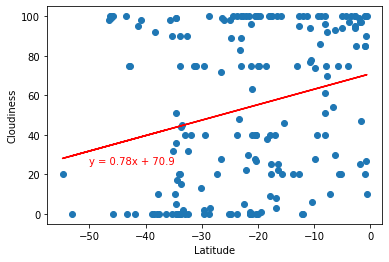

In [23]:
x_values = southern['Lat']
y_values = southern['Cloudiness']
plot_linear_regression(x_values, y_values, 'Cloudiness',(-50,25))

The very low r-value indicates that there's close to zero correlation between latitude and cloudiness in both hemisphers.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.00499132981599812


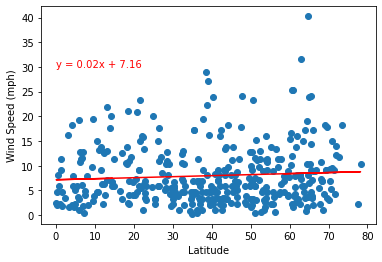

In [24]:
x_values = northern['Lat']
y_values = northern['Wind Speed']
plot_linear_regression(x_values, y_values, 'Wind Speed (mph)',(0,30))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.12084555164540302


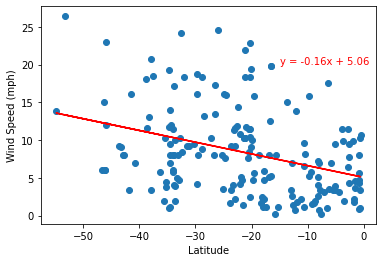

In [25]:
x_values = southern['Lat']
y_values = southern['Wind Speed']
plot_linear_regression(x_values, y_values, 'Wind Speed (mph)',(-15,20))

The low r-value indicates that there is a weak correlation between latitude and the wind speed. In the northern hemisphere, the correlation is extremely weak. 